In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)


In [6]:
epoch_df = pd.read_csv("epoch_summary.csv")



In [5]:
cp_df = pd.read_csv("cvfdt_metrics.csv")



In [7]:
y_true_dp = epoch_df["epoch_label"]
y_pred_dp = epoch_df["dp_alert"]

dp_accuracy  = accuracy_score(y_true_dp, y_pred_dp)
dp_precision = precision_score(y_true_dp, y_pred_dp, zero_division=0)
dp_recall    = recall_score(y_true_dp, y_pred_dp, zero_division=0)
dp_f1        = f1_score(y_true_dp, y_pred_dp, zero_division=0)

print("=== Data Plane (DP) Metrics ===")
print(f"Accuracy  : {dp_accuracy:.4f}")
print(f"Precision : {dp_precision:.4f}")
print(f"Recall    : {dp_recall:.4f}")
print(f"F1-score  : {dp_f1:.4f}")


=== Data Plane (DP) Metrics ===
Accuracy  : 0.9349
Precision : 0.9024
Recall    : 1.0000
F1-score  : 0.9487


In [8]:
cp_eval_df = epoch_df[epoch_df["dp_alert"] == 1]

y_true_cp = cp_eval_df["epoch_label"]
y_pred_cp = cp_eval_df["cp_alert"]

cp_accuracy  = accuracy_score(y_true_cp, y_pred_cp)
cp_precision = precision_score(y_true_cp, y_pred_cp, zero_division=0)
cp_recall    = recall_score(y_true_cp, y_pred_cp, zero_division=0)
cp_f1        = f1_score(y_true_cp, y_pred_cp, zero_division=0)

print("=== Control Plane (CP) Metrics ===")
print(f"Accuracy  : {cp_accuracy:.4f}")
print(f"Precision : {cp_precision:.4f}")
print(f"Recall    : {cp_recall:.4f}")
print(f"F1-score  : {cp_f1:.4f}")


=== Control Plane (CP) Metrics ===
Accuracy  : 0.9345
Precision : 0.9416
Recall    : 0.9887
F1-score  : 0.9646


In [9]:
y_true_tr = cp_df["traffic_label"]
y_pred_tr = cp_df["cp_pred"]

print("=== CP Traffic Detection ===")
print("Accuracy :", accuracy_score(y_true_tr, y_pred_tr))
print("Precision:", precision_score(y_true_tr, y_pred_tr, zero_division=0))
print("Recall   :", recall_score(y_true_tr, y_pred_tr, zero_division=0))
print("F1-score :", f1_score(y_true_tr, y_pred_tr, zero_division=0))


=== CP Traffic Detection ===
Accuracy : 0.9475833900612661
Precision: 1.0
Recall   : 0.9475833900612661
F1-score : 0.9730863334498427


In [10]:
y_true_v = cp_df["victim_label"]
y_pred_v = cp_df["cp_pred"]

print("=== CP Victim Attribution ===")
print("Accuracy :", accuracy_score(y_true_v, y_pred_v))
print("Precision:", precision_score(y_true_v, y_pred_v, zero_division=0))
print("Recall   :", recall_score(y_true_v, y_pred_v, zero_division=0))
print("F1-score :", f1_score(y_true_v, y_pred_v, zero_division=0))


=== CP Victim Attribution ===
Accuracy : 0.9319264805990469
Precision: 0.9389367816091954
Recall   : 0.9886535552193646
F1-score : 0.9631540162122328


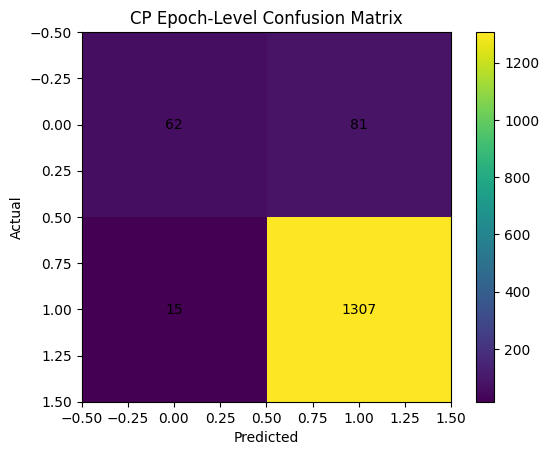

In [11]:
cm = confusion_matrix(y_true_cp, y_pred_cp)

plt.figure()
plt.imshow(cm)
plt.title("CP Epoch-Level Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


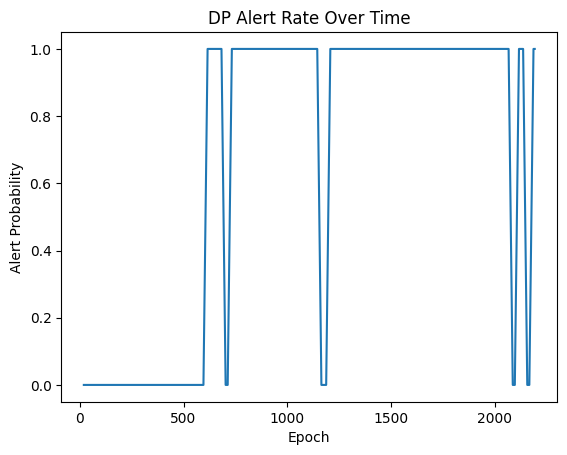

In [12]:
epoch_df["dp_alert"].rolling(20).mean().plot()
plt.title("DP Alert Rate Over Time")
plt.xlabel("Epoch")
plt.ylabel("Alert Probability")
plt.show()


In [13]:
summary = pd.DataFrame({
    "Plane": ["Data Plane", "Control Plane"],
    "Accuracy": [dp_accuracy, cp_accuracy],
    "Precision": [dp_precision, cp_precision],
    "Recall": [dp_recall, cp_recall],
    "F1-score": [dp_f1, cp_f1]
})

summary


,Plane,Accuracy,Precision,Recall,F1-score
0,Data Plane,0.934852,0.902389,1.000000,0.948690
1,Control Plane,0.934471,0.941643,0.988654,0.964576


In [14]:
epoch_df["final_alert"] = (
    (epoch_df["dp_alert"] == 1) & 
    (epoch_df["cp_alert"] == 1)
).astype(int)

epoch_df[["epoch_label", "dp_alert", "cp_alert", "final_alert"]].head()


,epoch_label,dp_alert,cp_alert,final_alert
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [15]:
y_true = epoch_df["epoch_label"]
y_pred = epoch_df["final_alert"]

acc  = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec  = recall_score(y_true, y_pred, zero_division=0)
f1   = f1_score(y_true, y_pred, zero_division=0)

print("=== DP + CP Combined Detection ===")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-score  : {f1:.4f}")


=== DP + CP Combined Detection ===
Accuracy  : 0.9563
Precision : 0.9416
Recall    : 0.9887
F1-score  : 0.9646


In [16]:
cm = confusion_matrix(y_true, y_pred)
cm


array([[ 792,   81],
       [  15, 1307]])

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

results = []

# DP only
results.append([
    "DP Only",
    accuracy_score(y_true, epoch_df["dp_alert"]),
    precision_score(y_true, epoch_df["dp_alert"], zero_division=0),
    recall_score(y_true, epoch_df["dp_alert"], zero_division=0),
    f1_score(y_true, epoch_df["dp_alert"], zero_division=0)
])

# CP only (evaluated when DP fires)
cp_eval = epoch_df[epoch_df["dp_alert"] == 1]
results.append([
    "CP Only",
    accuracy_score(cp_eval["epoch_label"], cp_eval["cp_alert"]),
    precision_score(cp_eval["epoch_label"], cp_eval["cp_alert"], zero_division=0),
    recall_score(cp_eval["epoch_label"], cp_eval["cp_alert"], zero_division=0),
    f1_score(cp_eval["epoch_label"], cp_eval["cp_alert"], zero_division=0)
])

# DP + CP
results.append([
    "DP + CP",
    acc, prec, rec, f1
])

summary = pd.DataFrame(
    results,
    columns=["Method", "Accuracy", "Precision", "Recall", "F1-score"]
)

summary


,Method,Accuracy,Precision,Recall,F1-score
0,DP Only,0.934852,0.902389,1.000000,0.948690
1,CP Only,0.934471,0.941643,0.988654,0.964576
2,DP + CP,0.956264,0.941643,0.988654,0.964576


In [18]:
from sklearn.metrics import confusion_matrix

def false_alarm_rate(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp / (fp + tn) if (fp + tn) > 0 else 0


In [21]:
far_combined = false_alarm_rate(
    epoch_df["epoch_label"],
    epoch_df["final_alert"]
)

far_combined


np.float64(0.09278350515463918)

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# DP ROC
fpr_dp, tpr_dp, _ = roc_curve(
    epoch_df["epoch_label"],
    epoch_df["dp_alert"]
)
auc_dp = auc(fpr_dp, tpr_dp)

# DP + CP ROC
fpr_comb, tpr_comb, _ = roc_curve(
    epoch_df["epoch_label"],
    epoch_df["final_alert"]
)
auc_comb = auc(fpr_comb, tpr_comb)


In [35]:
from sklearn.metrics import precision_score

precision_dp = precision_score(
    epoch_df["epoch_label"],
    epoch_df["dp_alert"]
)

precision_cp = precision_score(
    cp_eval["epoch_label"],
    cp_eval["cp_alert"]
)

precision_combined = precision_score(
    epoch_df["epoch_label"],
    epoch_df["final_alert"]
)

precision_dp, precision_cp, precision_combined


(0.9023890784982935, 0.94164265129683, 0.94164265129683)

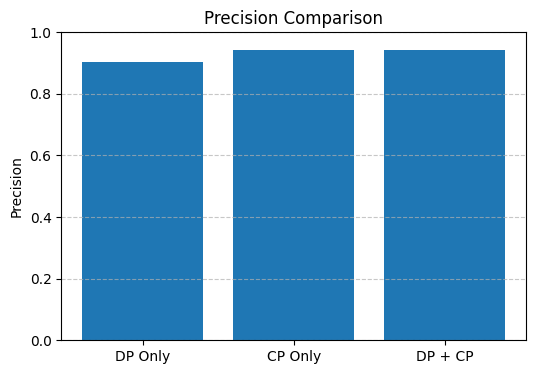

In [26]:
labels = ["DP Only", "CP Only", "DP + CP"]
precision_values = [precision_dp, precision_cp, precision_combined]

plt.figure(figsize=(6,4))
plt.bar(labels, precision_values)
plt.ylabel("Precision")
plt.title("Precision Comparison")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [29]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt


In [30]:
y_true = epoch_df["epoch_label"]        # 0 / 1
y_score_dp = epoch_df["dp_alert"]       # binary OK

precision_dp, recall_dp, _ = precision_recall_curve(y_true, y_score_dp)
ap_dp = average_precision_score(y_true, y_score_dp)


In [31]:
y_score_cp = epoch_df["cp_alert"]

precision_cp, recall_cp, _ = precision_recall_curve(y_true, y_score_cp)
ap_cp = average_precision_score(y_true, y_score_cp)


In [32]:
y_score_combined = epoch_df["final_alert"]

precision_combined, recall_combined, _ = precision_recall_curve(
    y_true, y_score_combined
)
ap_combined = average_precision_score(y_true, y_score_combined)


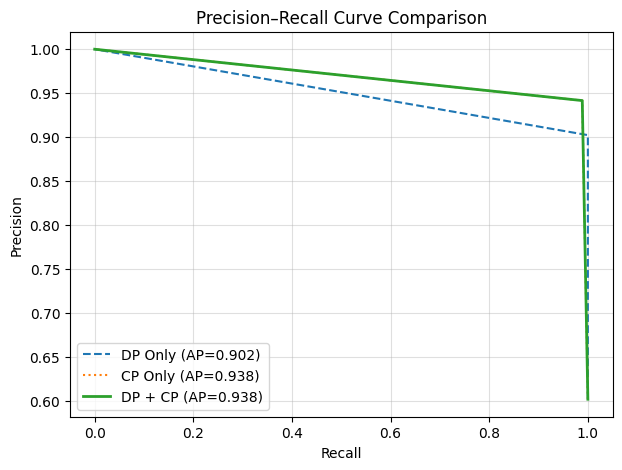

In [33]:
plt.figure(figsize=(7,5))

plt.plot(
    recall_dp, precision_dp,
    label=f"DP Only (AP={ap_dp:.3f})",
    linestyle="--"
)

plt.plot(
    recall_cp, precision_cp,
    label=f"CP Only (AP={ap_cp:.3f})",
    linestyle=":"
)

plt.plot(
    recall_combined, precision_combined,
    label=f"DP + CP (AP={ap_combined:.3f})",
    linewidth=2
)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve Comparison")
plt.legend()
plt.grid(alpha=0.4)
plt.show()
